In [1]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
from matplotlib import rcParams
rcParams.update({'font.size': 12})

from py21cmemu import Emulator
from corner import corner

In [2]:
with np.load('Radio_Test_data_sample.npz') as f:
    test_params = f['params']
    test_Tb = f['Tb']
    test_Tr = f['Tr']
    test_PS = f['PS']
    test_xHI = f['xHI']
    test_tau = f['tau']
    PS_k = f['PS_k']
    PS_z = f['PS_z']
    test_z = f['redshifts']
    zs = f['redshifts']

In [3]:
emu = Emulator(emulator="radio_background")

In [4]:
normed_input_params, output, output_errors = emu.predict(test_params)

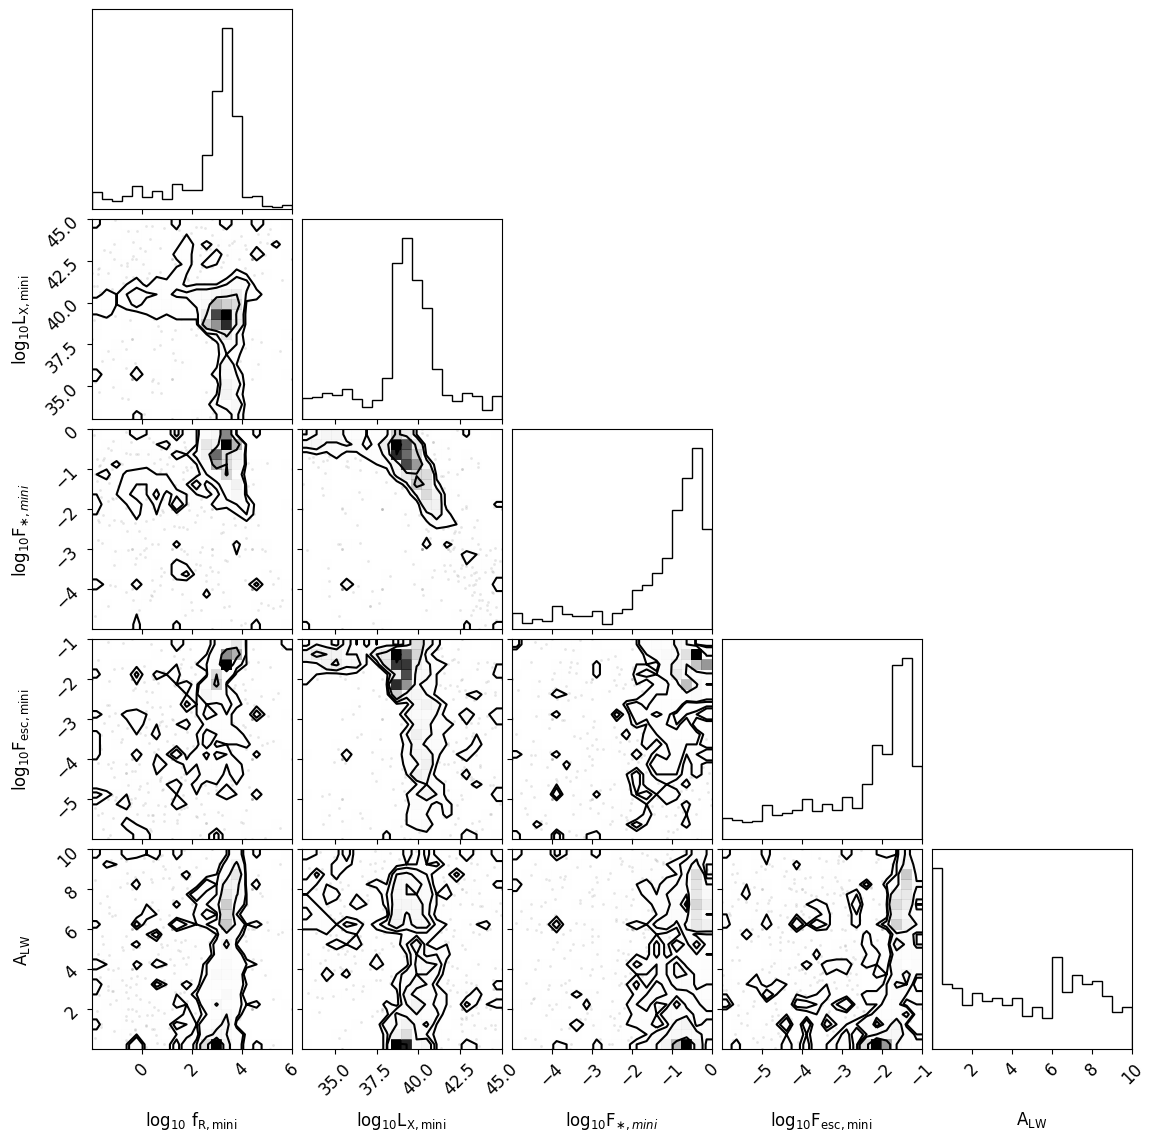

In [5]:
labels = output.properties.parameter_labels
corner(test_params, labels=labels)
plt.show()

In [ ]:
idxs = np.arange(test_tau.shape[0])
np.random.seed(42)
np.random.shuffle(idxs)

(1000,)


In [ ]:
N = 10
idxs = idxs[:N]

(1000, 25, 20)


In [10]:
cs = ['r', 'g', 'b', 'lime', 'cyan', 'orange', 'k', 'tan', 'firebrick', 'magenta']

In [27]:
kbin = 11
PS_k[kbin]

0.10969735366408447

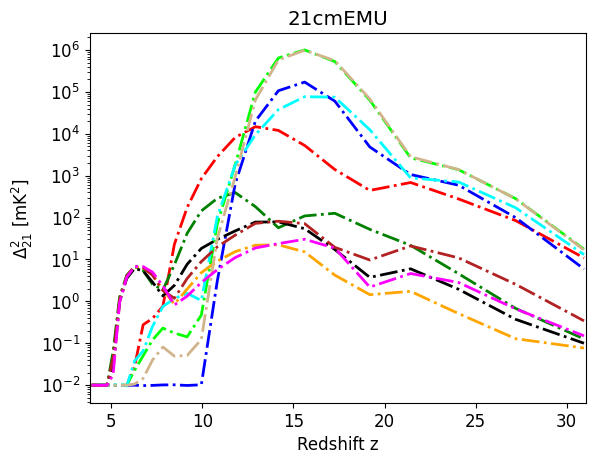

In [20]:
for i, c in zip(idxs, cs):

    plt.plot(PS_z, output.PS[i, :, kbin], lw = 2, ls = '-.', color = c)

plt.ylabel(r'$\Delta_{21}^2$ [mK$^2$]')
plt.xlabel('Redshift z')
plt.title('21cmEMU')
plt.yscale('log')
plt.xlim(PS_z[0]-0.1, PS_z[-1]+0.1)
plt.show()

In [22]:
zbin = 11
PS_z[zbin]

8.46594037485638

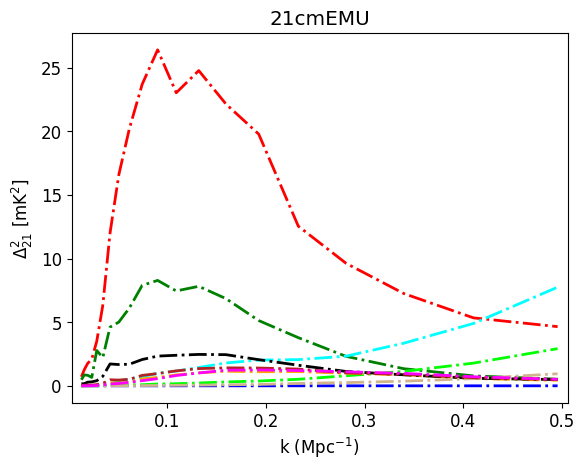

In [26]:
for i, c in zip(idxs, cs):

    plt.plot(PS_k, output.PS[i, zbin, :], lw = 2, ls = '-.', color = c)

plt.ylabel(r'$\Delta_{21}^2$ [mK$^2$]')
plt.xlabel(r'k (Mpc$^{-1}$)')
plt.title('21cmEMU')
plt.xlim(PS_k[0]-1e-2, PS_k[-1]+1e-2)
plt.show()